# ANALYZING MARKETING CAMPAIGNS WITH PANDAS

### Chapitre I : Pandas

In [4]:
# Importing data using pandas

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
pip install quarto

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement quarto (from versions: none)
ERROR: No matching distribution found for quarto


In [8]:
marketing = pd.read_csv('marketing.csv')
marketing

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True
...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,1/17/18,Email,control,True,German,German,45-55 years,1/17/18,1/24/18,Email,False
10033,a100007291,1/17/18,Email,control,True,German,German,55+ years,1/17/18,NaN,Email,True
10034,a100007292,1/5/18,Instagram,control,False,German,German,55+ years,1/17/18,NaN,Email,True
10035,a100007293,1/17/18,Email,control,True,German,German,0-18 years,1/17/18,NaN,Email,True


In [ ]:
 # Inspecting data

In [9]:
print(marketing.head())

      user_id date_served marketing_channel          variant converted  \
0  a100000029      1/1/18         House Ads  personalization      True   
1  a100000030      1/1/18         House Ads  personalization      True   
2  a100000031      1/1/18         House Ads  personalization      True   
3  a100000032      1/1/18         House Ads  personalization      True   
4  a100000033      1/1/18         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years          1/1/18   
1            English            English  19-24 years          1/1/18   
2            English            English  24-30 years          1/1/18   
3            English            English  30-36 years          1/1/18   
4            English            English  36-45 years          1/1/18   

  date_canceled subscribing_channel is_retained  
0           NaN           House Ads        True  
1           NaN       

In [ ]:
# Summary statistics

In [10]:
print(marketing.describe())

           user_id date_served marketing_channel  variant converted  \
count        10037       10021             10022    10037     10022   
unique        7309          31                 5        2         2   
top     a100000882     1/15/18         House Ads  control     False   
freq            12         789              4733     5091      8946   

       language_displayed language_preferred    age_group date_subscribed  \
count               10037              10037        10037            1856   
unique                  4                  4            7              31   
top               English            English  19-24 years         1/16/18   
freq                 9793               9275         1682             163   

       date_canceled subscribing_channel is_retained  
count            577                1856        1856  
unique           115                   5           2  
top           4/2/18           Instagram        True  
freq              15                 6

In [ ]:
# Missing values & data types

In [11]:
print(marketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB
None


### data type of column 

In [ ]:
# Print a data type of a single column

In [13]:
print(marketing['converted'].dtype)

object


### Changing the data type of a column

In [ ]:
# Change the data type of a column

In [14]:
marketing['converted'] = marketing['converted']\
.astype('bool')
print(marketing['converted'].dtype)

bool


### Creating new boolean columns

In [15]:
marketing['is_house_ads'] = np.where(marketing['marketing_channel'] == 'House Ads',True, False)
marketing['is_house_ads']
print(marketing.is_house_ads.head(5))

0    True
1    True
2    True
3    True
4    True
Name: is_house_ads, dtype: bool


### Mapping values to existing columns

In [16]:
print(marketing['marketing_channel'].head(5))

0    House Ads
1    House Ads
2    House Ads
3    House Ads
4    House Ads
Name: marketing_channel, dtype: object


In [17]:
channel_dict = {"House Ads": 1,"Instagram": 2,"Facebook": 3,"Email": 4,"Push": 5}

In [18]:
marketing['channel_code'] = marketing['marketing_channel']\
.map(channel_dict)
marketing['channel_code']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
10032    4.0
10033    4.0
10034    2.0
10035    4.0
10036    3.0
Name: channel_code, Length: 10037, dtype: float64

### Date columns

In [ ]:
# Read date columns using parse

In [19]:
marketing = pd.read_csv('marketing.csv',parse_dates=['date_served','date_subscribed','date_canceled'])
marketing

C:\Users\Firmin Atchagako\AppData\Local\Temp\ipykernel_4188\435519771.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd.read_csv('marketing.csv',parse_dates=['date_served','date_subscribed','date_canceled'])
C:\Users\Firmin Atchagako\AppData\Local\Temp\ipykernel_4188\435519771.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd.read_csv('marketing.csv',parse_dates=['date_served','date_subscribed','date_canceled'])
C:\Users\Firmin Atchagako\AppData\Local\Temp\ipykernel_4188\435519771.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketin

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True
...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,2018-01-17,Email,control,True,German,German,45-55 years,2018-01-17,2018-01-24,Email,False
10033,a100007291,2018-01-17,Email,control,True,German,German,55+ years,2018-01-17,NaT,Email,True
10034,a100007292,2018-01-05,Instagram,control,False,German,German,55+ years,2018-01-17,NaT,Email,True
10035,a100007293,2018-01-17,Email,control,True,German,German,0-18 years,2018-01-17,NaT,Email,True


In [ ]:
# Convert already existing column to datetime column

In [20]:
marketing['date_served'] = pd.to_datetime(marketing['date_served'])
marketing['date_served']

0       2018-01-01
1       2018-01-01
2       2018-01-01
3       2018-01-01
4       2018-01-01
           ...    
10032   2018-01-17
10033   2018-01-17
10034   2018-01-05
10035   2018-01-17
10036   2018-01-06
Name: date_served, Length: 10037, dtype: datetime64[ns]

### Initial Exploratory Analysis

In [ ]:
# Aggregate unique users that see ads by date

In [21]:
daily_users = marketing.groupby(['date_served'])\
['user_id'].nunique()
print(daily_users)

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
Name: user_id, dtype: int64


### Visualizing results

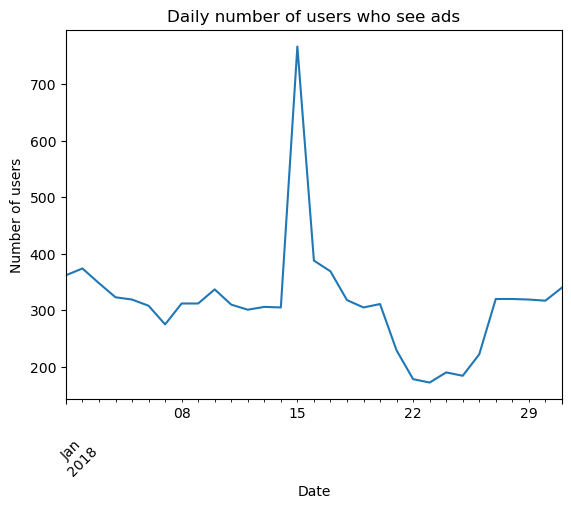

In [22]:
# Plot
daily_users.plot()
# Annotate
plt.title('Daily number of users who see ads')
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.xticks(rotation = 45)
plt.show()


### Chapitre 2 : Introduction to common marketing metrics

In [ ]:
# Conversion rate formula 
## Conversion rate = Number of people who convert/Total number of people we marketed to


In [ ]:
# Calculating conversion rate using pandas

In [23]:
subscribers = marketing[marketing['converted'] == True]\
['user_id'].nunique()
subscribers
total = marketing['user_id'].nunique()
total

7309

In [19]:
conv_rate = subscribers/total
conv_rate
print(round(conv_rate*100, 2),'%')

13.89 %


In [ ]:
# Retention rate formula
## Retention rate = Number of people who remain subscribed/Total number of people who converted

In [ ]:
# Calculating retention rate

In [20]:
retained = marketing[marketing['is_retained'] == True]\
['user_id'].nunique()
subscribers = marketing[marketing['converted'] == True]\
['user_id'].nunique()
retention = retained/subscribers
print(round(retention*100, 2),'%')

66.8 %


### Customer segmentation

In [ ]:
# # Subset to include only House Ads

In [24]:
house_ads = marketing\
[marketing['subscribing_channel'] == 'House Ads']
house_ads

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True
...,...,...,...,...,...,...,...,...,...,...,...,...
349,a100000514,2018-01-26,House Ads,personalization,True,English,English,19-24 years,2018-01-26,NaT,House Ads,True
350,a100000515,2018-01-27,House Ads,personalization,True,English,English,24-30 years,2018-01-27,NaT,House Ads,True
351,a100000523,2018-01-28,House Ads,personalization,True,English,English,0-18 years,2018-01-28,NaT,House Ads,True
352,a100000524,2018-01-30,House Ads,personalization,True,English,Spanish,19-24 years,2018-01-30,NaT,House Ads,True


In [25]:
retained = house_ads[house_ads['is_retained'] == True]\
['user_id'].nunique()
retained

173

In [26]:
subscribers = house_ads[house_ads['converted'] == True]\
['user_id'].nunique()
subscribers

298

In [26]:
retention_rate = retained/subscribers
print(round(retention_rate*100,2),'%')

17.04 %


In [27]:
retained = marketing[marketing['is_retained'] == True]\
.groupby(['subscribing_channel'])\
['user_id'].nunique()
print(retained)

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64


In [ ]:
# Group by subscribing_channel and calculate subscribers

In [28]:
subscribers = marketing[marketing['converted'] == True]\
.groupby(['subscribing_channel'])\
['user_id'].nunique()
print(subscribers)

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64


### Segmenting results

In [29]:
# Calculate the retention rate across the DataFrame

channel_retention_rate = (retained/subscribers)*100
print(channel_retention_rate)

subscribing_channel
Email        87.577640
Facebook     68.778281
House Ads    58.053691
Instagram    68.103448
Push         70.129870
Name: user_id, dtype: float64


### Plotting campaign results

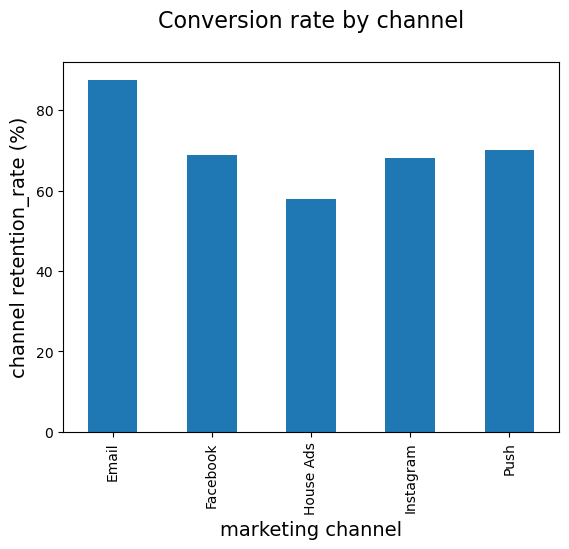

In [30]:
# Create a bar chart using channel retention DataFrame
channel_retention_rate.plot(kind = 'bar')
# Add a title and x and y-axis labels
plt.title('Conversion rate by channel\n', size = 16)
plt.xlabel('marketing channel', size = 14)
plt.ylabel('channel retention_rate (%)'
, size = 14)
# Display the plot
plt.show()

In [40]:
# Grouping by multiple columns

In [31]:
language = marketing.groupby(['date_served','language_preferred'])\
['user_id'].count()
print(language.head())

date_served  language_preferred
2018-01-01   Arabic                  4
             English               355
             German                  5
             Spanish                11
2018-01-02   Arabic                  4
Name: user_id, dtype: int64


In [ ]:
# Unstacking after groupby

In [42]:
language = pd.DataFrame(language.unstack(level=1))
print(language.head())

language_preferred  Arabic  English  German  Spanish
date_served                                         
2018-01-01             4.0    355.0     5.0     11.0
2018-01-02             4.0    397.0     6.0     10.0
2018-01-03             3.0    374.0     3.0      8.0
2018-01-04             2.0    318.0     2.0     14.0
2018-01-05             1.0    314.0     2.0     14.0


AttributeError: 'Series' object has no attribute 'columns'

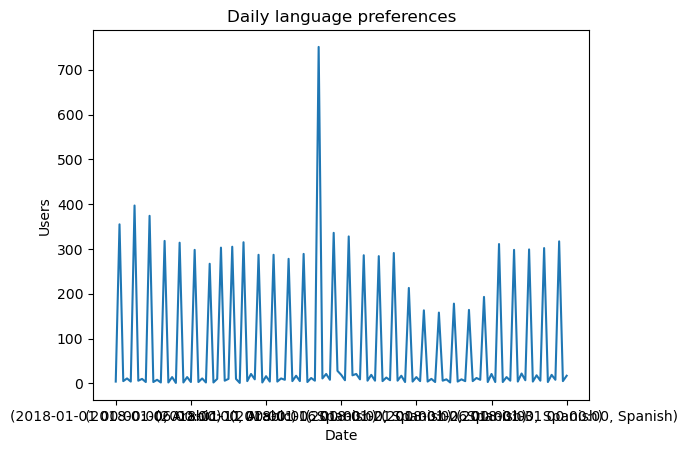

In [32]:
language.plot()
plt.title('Daily language preferences')
plt.xlabel('Date')
plt.ylabel('Users')
plt.legend(loc = 'upper right'
,
labels = language.columns.values)
plt.show()

### Creating grouped bar charts

In [ ]:
# Create DataFrame grouped by age and language preference

In [35]:
language_age = marketing.groupby(['language_preferred','age_group'])\
['user_id'].count()
language_age = pd.DataFrame(language_age.unstack(level=1))
print(language_age.head())

age_group           0-18 years  19-24 years  24-30 years  30-36 years  \
language_preferred                                                      
Arabic                      19           26           19           19   
English                   1421         1560         1442         1251   
German                      31           29           35           16   
Spanish                     68           67           72           69   

age_group           36-45 years  45-55 years  55+ years  
language_preferred                                       
Arabic                       19           21         22  
English                    1260         1240       1101  
German                       19           25         12  
Spanish                      55           67         52  


In [ ]:
# Plotting language preferences by age group

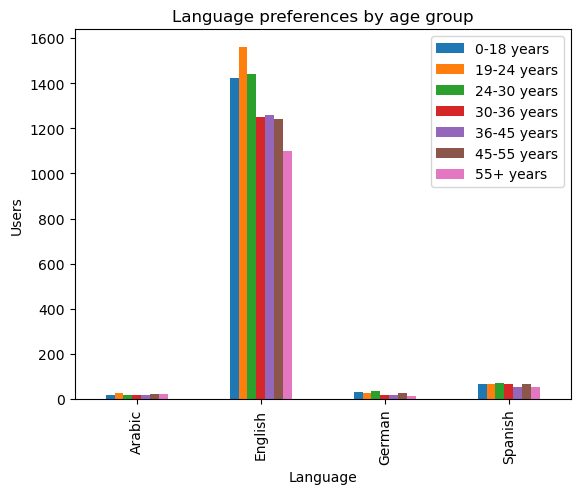

In [36]:
language_age.plot(kind='bar')
plt.title('Language preferences by age group')
plt.xlabel('Language')
plt.ylabel('Users')
plt.legend(loc = 'upper right',labels = language_age.columns.values)
plt.show()
